In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

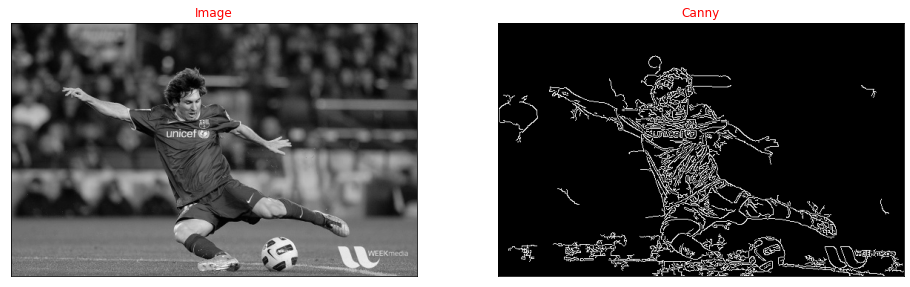

In [2]:
fig = plt.figure(figsize=(16,8))
img = cv2.imread('messi.jpg',0)

#canny edge detection consists of 5 steps:
#  1. Noise reduction (Gaussian Blur)
#  2. Gradient Calculation (Intensity measurement)
#  3. Non-maximum Supression (Get rid of superior response)
#  4. Double Threshold (Check Potential Edges)
#  5. Edge Tracking by Hysteresis

canny = cv2.Canny(img, 10, 220,)

titles = ['Image','Canny']
images = [img,canny]

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i], color='red')
    plt.xticks([])
    plt.yticks([])

plt.show()

### Using TrackBar

In [3]:
def nothing(x):
    pass

cv2.namedWindow('Image')
cv2.createTrackbar('Th_lower','Image',0,255,nothing)
cv2.createTrackbar('Th_upper','Image',0,255,nothing)

while(True):
    img = cv2.imread('messi.jpg', 0)
    canny_l = cv2.getTrackbarPos('Th_lower', 'Image')
    canny_u = cv2.getTrackbarPos('Th_lower', 'Image')
    
    img = cv2.Canny(img,canny_l,canny_u)
    
    cv2.imshow('Image',img)
    k = cv2.waitKey(1) & 0xFF
    if k==27:
        break
cv2.destroyAllWindows()

### Self Pratice

In [2]:
def nothing(x):
    pass

cap = cv2.VideoCapture(0)
cv2.namedWindow('Frame')

cv2.createTrackbar('TH Lower', 'Frame', 0, 255, nothing)
cv2.createTrackbar('TH Upper', 'Frame', 0, 255, nothing)

while(True):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    thl = cv2.getTrackbarPos('TH Lower','Frame')
    thu = cv2.getTrackbarPos('TH Upper','Frame')
    
    canny = cv2.Canny(frame, thl, thu)
    
    cv2.imshow('Image', canny)
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
cv2.destroyAllWindows()